<a href="https://colab.research.google.com/github/Tonry12/BSC_DPDM23/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [83]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
wt = pd.read_csv('/content/drive/MyDrive/SPN/seattle-weather.csv')

In [86]:
df = wt

In [87]:
#checking the types of weather conditions
np.unique(df['weather'])

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

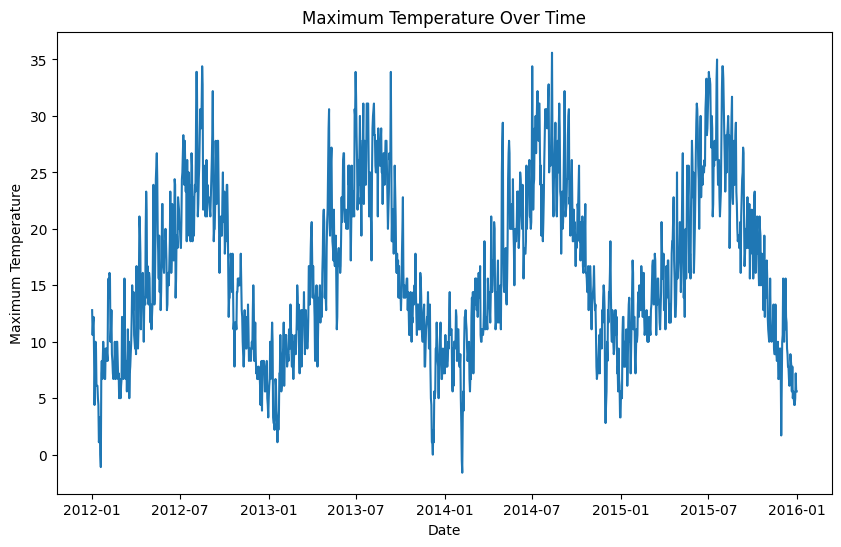

In [88]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['temp_max'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')

plt.show()

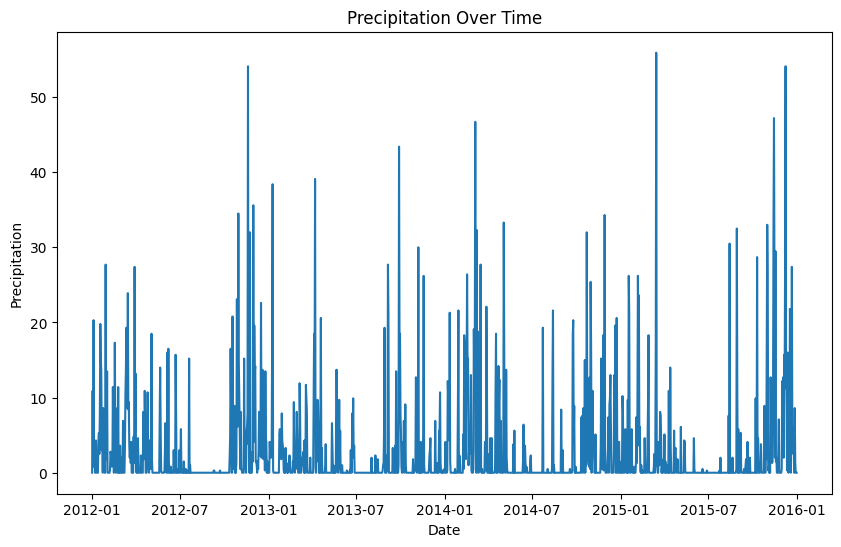

In [89]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['precipitation'])
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()

In [90]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
#replace value to 1-5
dict_ = {
    'drizzle': 0,
    'fog': 1,
    'rain': 2,
    'snow': 3,
    'sun': 4
}

# Replace the values in the 'weather' column using the mapping dictionary
df['weather_m'] = df['weather'].map(dict_)

In [93]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
weather_m                 int64
dtype: object

In [94]:
df.describe().round()  # Gives the statistical Summary of numeric Variables

,date,precipitation,temp_max,temp_min,wind,weather_m
count,1461,1461.0,1461.0,1461.0,1461.0,1461.0
mean,2013-12-31 00:00:00,3.0,16.0,8.0,3.0,3.0
min,2012-01-01 00:00:00,0.0,-2.0,-7.0,0.0,0.0
25%,2012-12-31 00:00:00,0.0,11.0,4.0,2.0,2.0
50%,2013-12-31 00:00:00,0.0,16.0,8.0,3.0,2.0
75%,2014-12-31 00:00:00,3.0,22.0,12.0,4.0,4.0
max,2015-12-31 00:00:00,56.0,36.0,18.0,10.0,4.0
std,NaN,7.0,7.0,5.0,1.0,1.0


In [95]:
data = df

In [96]:
x = data[['precipitation','temp_max','temp_min','wind']]
y = data['weather_m']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [99]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=20, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1387, Test set:74
Fold:2, Train set: 1388, Test set:73
Fold:3, Train set: 1388, Test set:73
Fold:4, Train set: 1388, Test set:73
Fold:5, Train set: 1388, Test set:73
Fold:6, Train set: 1388, Test set:73
Fold:7, Train set: 1388, Test set:73
Fold:8, Train set: 1388, Test set:73
Fold:9, Train set: 1388, Test set:73
Fold:10, Train set: 1388, Test set:73
Fold:11, Train set: 1388, Test set:73
Fold:12, Train set: 1388, Test set:73
Fold:13, Train set: 1388, Test set:73
Fold:14, Train set: 1388, Test set:73
Fold:15, Train set: 1388, Test set:73
Fold:16, Train set: 1388, Test set:73
Fold:17, Train set: 1388, Test set:73
Fold:18, Train set: 1388, Test set:73
Fold:19, Train set: 1388, Test set:73
Fold:20, Train set: 1388, Test set:73


In [100]:
earlystopping = EarlyStopping(
         min_delta = 0.001,
         patience = 20,
         restore_best_weights = True
)

In [101]:
#using sequential model to create neural network
#regularizer and dropouts are used for avoid overfitting
#'relu' and 'softmax' activation functions are applied to create neural network

model = Sequential([
    Flatten(),
    BatchNormalization(),
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation = 'softmax')
])

In [102]:
#while using a few features for classification sparse categorical crossentropy loss function is mainly used
opt = Adam(learning_rate=0.001)
model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#fitting model to predict and evaluate the data
history = model.fit(
    x_train, y_train,
    epochs = 100, batch_size = 128,
    validation_data = (x_test, y_test),callbacks = [earlystopping]
)

Epoch 1/100
9/9 [==============================] - 3s 48ms/step - loss: 4.0484 - accuracy: 0.3324 - val_loss: 3.8698 - val_accuracy: 0.4563
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 3.4749 - accuracy: 0.5215 - val_loss: 3.6209 - val_accuracy: 0.5273
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 3.1968 - accuracy: 0.6265 - val_loss: 3.4832 - val_accuracy: 0.6066
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 3.0096 - accuracy: 0.6822 - val_loss: 3.3167 - val_accuracy: 0.6639
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 2.8969 - accuracy: 0.7059 - val_loss: 3.1605 - val_accuracy: 0.7049
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 2.7777 - accuracy: 0.7196 - val_loss: 3.0472 - val_accuracy: 0.7186
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 2.6586 - accuracy: 0.7242 - val_loss: 2.9540 - val_accuracy: 0.7268
Epoch 8/100
9/9 [===

In [103]:
pre = model.predict(x_test)
model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.8525


[0.6515682935714722, 0.8524590134620667]

<Axes: >

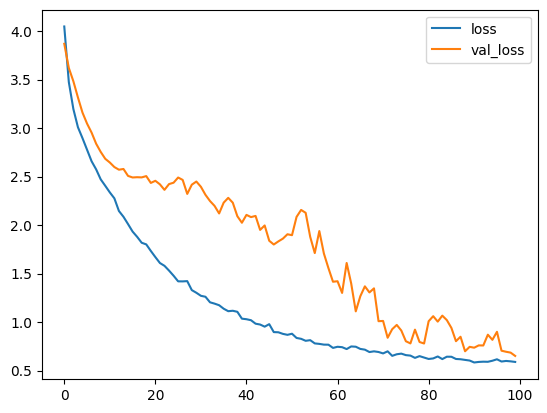

In [104]:
#The graph shows that loss and validation loss is decreasing which means our model performs well
dataframe = pd.DataFrame(history.history)
dataframe.loc[:,['loss','val_loss']].plot()

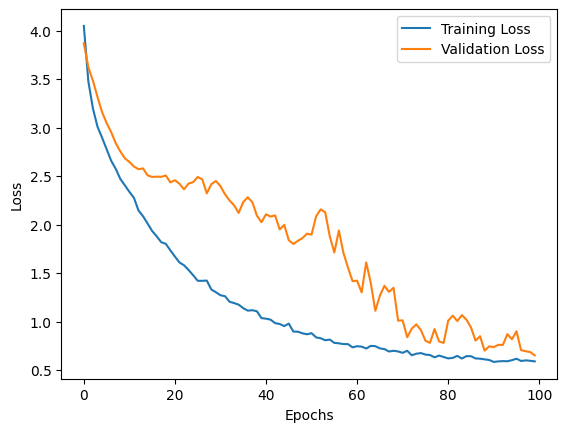

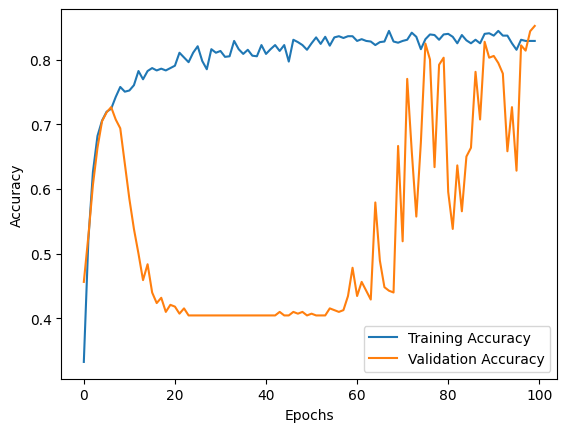

In [107]:
import matplotlib.pyplot as plt

# วาดกราฟความสูญเสีย (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# วาดกราฟความแม่นยำ (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [105]:
#this function is used in order to determine the weather pattern
def find_key(dict_, value):
    for key, val in dict_.items():
        if val == value:
            return key
    return None

In [106]:
#precipitation: 5; temp_max: 15; temp_min= 3; wind: 3
x_example = [[
    5,15,3,3
]]

y_probs = model.predict(x_example)
y_pred = np.argmax(y_probs, axis=1)
threshold = 0.5
y_pred_thresh = (y_probs > threshold).astype(int)
n = 0
for i in y_pred_thresh:
    n=0
    for j in i:
        if(j == 1):
            print(find_key(dict_, n))
        n+=1

1/1 [==============================] - 0s 161ms/step
rain
